In [388]:
class Room():
    shape = [] 

    def __init__(self, shape):
        self.shape = shape

In [389]:
class FurnitureItem():
    unitcost = 0
    shape = []
    
    def __init__(self, unitcost, shape):
        self.unit_cost = unitcost
        self.shape = shape

In [390]:
class Problem():
    def __init__(self, room, furniture):
        self.room = room
        self.furniture = furniture

In [391]:
problems = []

In [392]:
with open('problems.rfp') as f:
  for line in f:
    furnitureList = []
    
    problem = line.replace(" ","").split("#")
    
    room_shape = problem[0].split(":")[1]
    furniture = problem[1].split(";")
    
    
    room = Room([tuple(float(i) for i in el.strip('()').split(',')) for el in room_shape.split('),(')])
    
    for furnitureItem in furniture:
        parse_furniture = furnitureItem.split(":")
        unit_cost = parse_furniture[0]
        shape = parse_furniture[1].split(",")
        furnitureItem = FurnitureItem(unit_cost, shape)
        furnitureList.append(furnitureItem)
    problems.append(Problem(room,furnitureList))

In [393]:
from matplotlib import pyplot
from shapely.geometry.polygon import LinearRing, Polygon
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


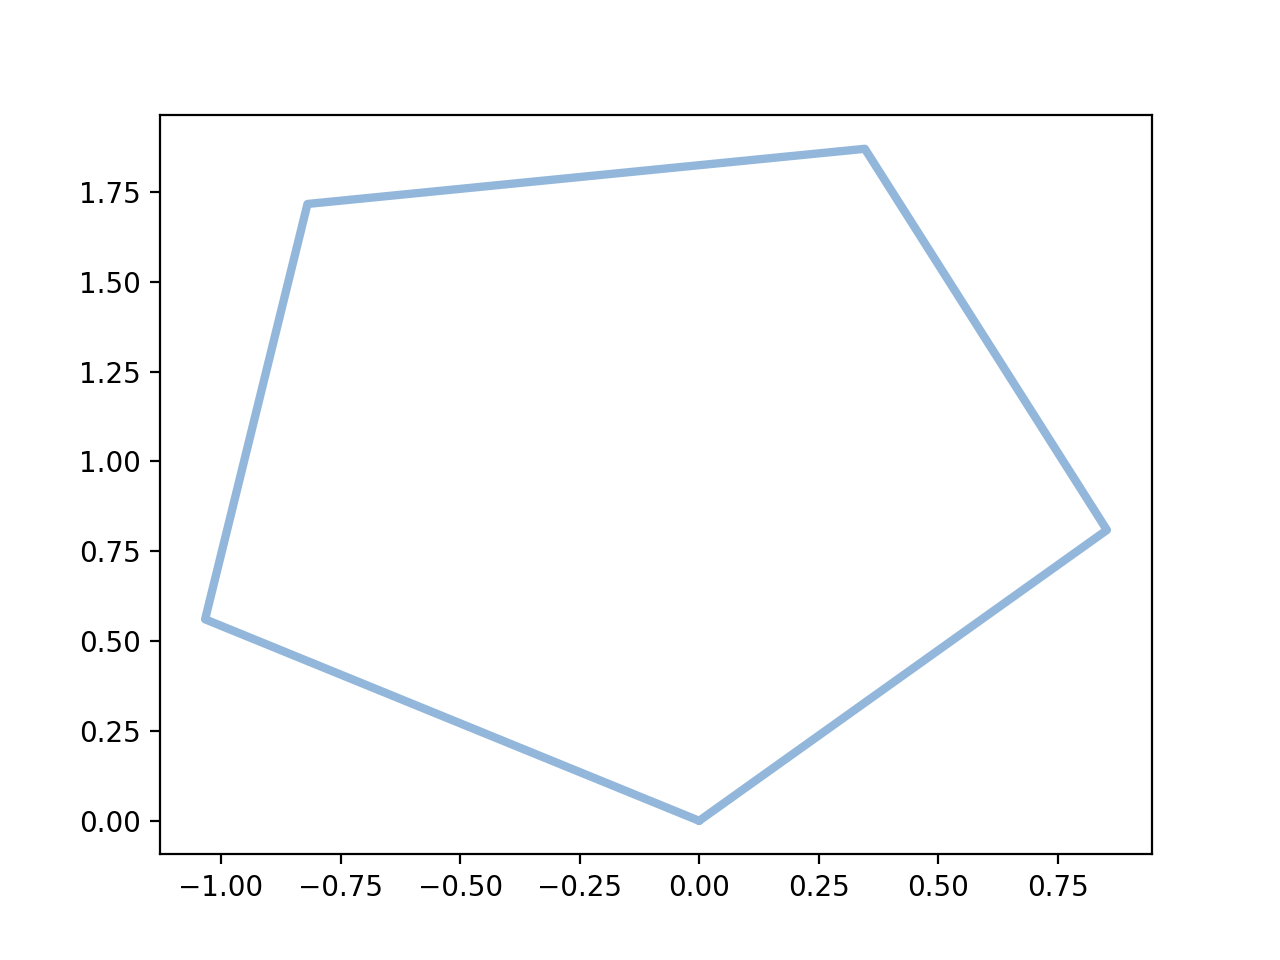

In [422]:
poly = Polygon(problems[3].room.shape)
x,y = poly.exterior.xy
plt.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
plt.show()